In [2]:
from audio_loader import load_file
import matplotlib.pyplot as plt
# I want refina display
%config InlineBackend.figure_format = 'retina'
audio, sample_rate = load_file('datafiles/recording.wav')


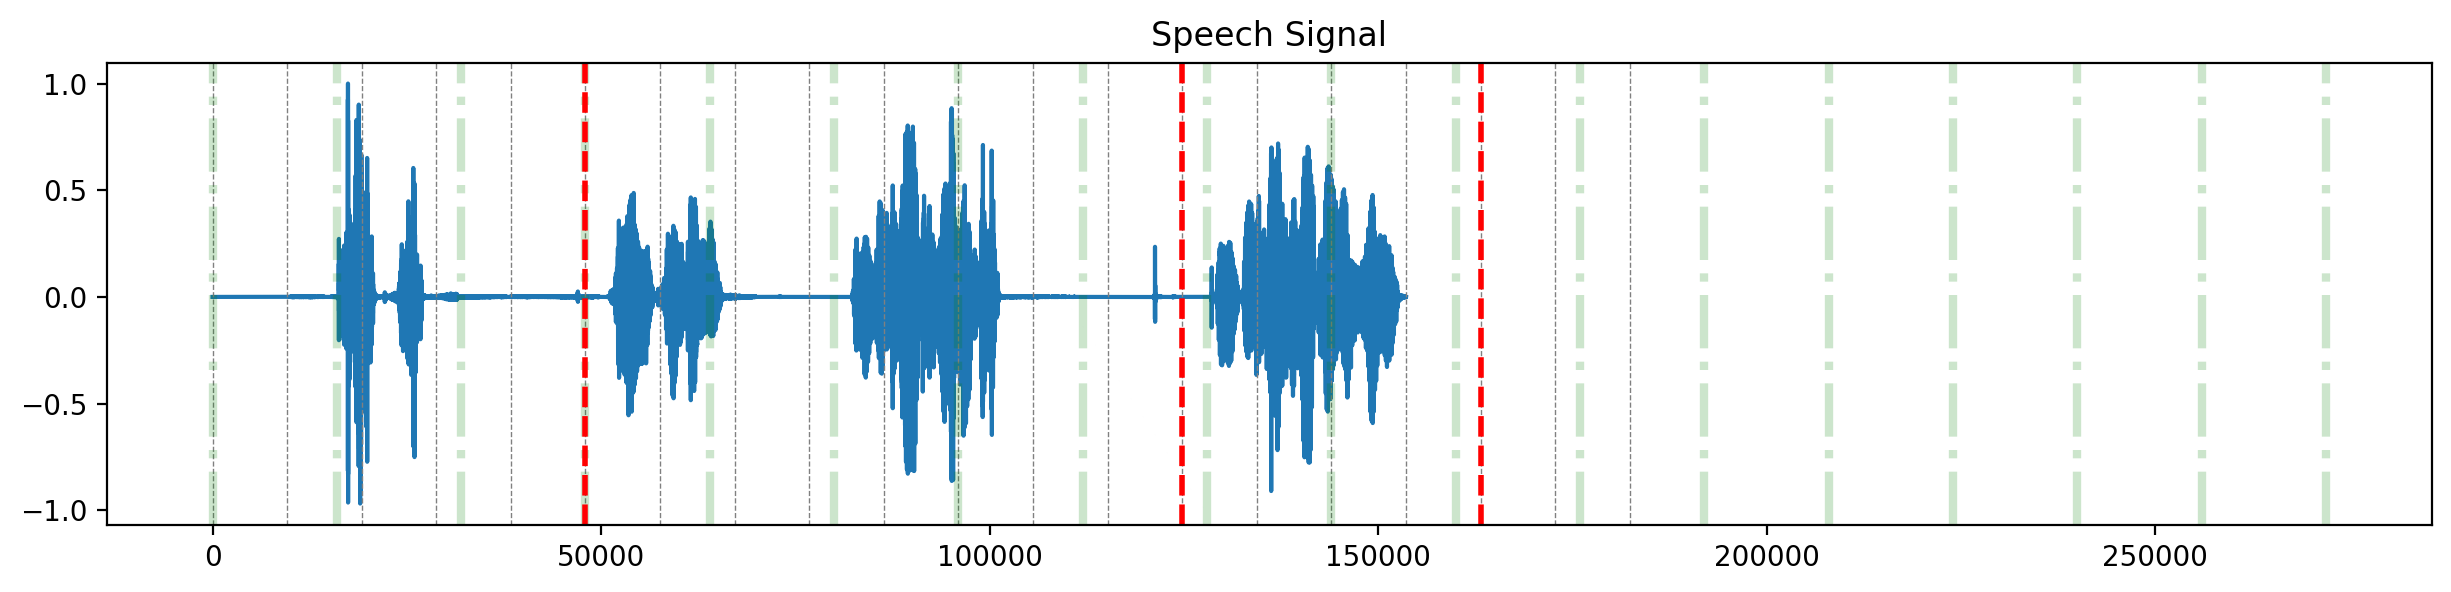

In [8]:
plt.subplots(figsize = (15,3))
plt.plot(audio)

for i in range(20):
    plt.axvline(i * 9600, color = 'gray', linestyle = '--', lw = 0.5)
    
for i in range(18):
    plt.axvline(i * 16000, color = 'green', linestyle = '-.', lw = 3, alpha = 0.2)
    
plt.axvline(7.8 * 16000, color = 'red', linestyle = '--', lw = 2)
plt.axvline(3.0 * 16000, color = 'red', linestyle = '--', lw = 2)
plt.axvline(10.2 * 16000, color = 'red', linestyle = '--', lw = 2)
plt.title("Speech Signal")
plt.show()

In [13]:
import ollama
from ollama import ChatResponse, chat
import copy

class DuplexChatter:
   
    def __init__(self, 
                 sys_prompt:str = None, 
                 knowledge:str = None):
        
        if not sys_prompt:
            sys_prompt = "You are a helpful assitant."
            
        if knowledge:
            sys_prompt += f"{sys_prompt}\nWhen necessary, refer to the following knowledge to provide useful information: \n<knowledge>{knowledge}</knowledge>"
            
        self.messages = [
            {'role': 'system','content': sys_prompt}
        ]
        
    @property
    def history(self) -> str:
        return '\n'.join([f"{m['role']}: {m['content']}" for m in self.messages])
        
    def add_user_query(self, query:str):
        """You have to add a user query to the chatting history."""
        self.messages.append({
            'role': 'user',
            'content': query,
        })
        
    def add_assistant_reply(self, reply:str):
        """You have to add an assitant reply to the chatting history,"""
        self.messages.append({
            'role': 'assistant',
            'content': reply,
        })
        
    def chat(self, query:str):
        messages = copy.deepcopy(self.messages)
        messages.append({
            'role': 'user',
            'content': query}
        )
        response: ChatResponse = chat(model='qwen2.5:14b', messages=messages)
        return response.message.content

In [21]:
chatter = DuplexChatter()

In [30]:
query = " 我是谁？我， 我，不是你"
response = chatter.chat(query)
chatter.add_user_query(query)
chatter.add_assistant_reply(response)